# Predicting  birds species by images using Tensorflow & Keras

Dataset available on Kaggle: https://www.kaggle.com/gpiosenka/100-bird-species

<img src="https://cdn.the-scientist.com/assets/articleNo/66820/hImg/34886/bird-banner3-l.png">

In [10]:
# importing the library
import tensorflow as tf

## Creating the Neural Network

In [11]:
classifier=tf.keras.models.Sequential()

## Adding the Convolutional Layers

In [12]:
# TESTE
classifier.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), data_format= "channels_last",
                             input_shape=(150, 150, 3), activation="relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Adding a second convolutional layer
classifier.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

## Adding Dense Layers

In [13]:
# TESTE
classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(512, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(256,activation='relu'))
classifier.add(tf.keras.layers.Dense(128,activation='relu'))
classifier.add(tf.keras.layers.Dense(180, activation = 'sigmoid')) #It must have 180 cells in order to classify the 180 species


# Let's also compile the classifier
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

## Data Preprocessing and Augmentation with ImageDataGenerator

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,  # just a simple rescale of the image
        rotation_range=15, # images with rotate between 0 and 15 degrees
        width_shift_range= 0.2 , # moving the image around
        height_shift_range= 0.2 , 
        shear_range=0.2 , # shearing the image to train in different angles
        zoom_range=0.2 , # zooming also helps to get the main features of the image
        horizontal_flip=True, # this will reflect the image horizontally
        fill_mode= 'nearest' # replaces the pixels lost in the process with the closest ones
        )

test_datagen = ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


In [16]:
training_set = train_datagen.flow_from_directory('/kaggle/input/100-bird-species/180/train', target_size=(150, 150), class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        '/kaggle/input/100-bird-species/180/test',
        target_size=(150, 150),
       class_mode='categorical')

Found 24497 images belonging to 180 classes.
Found 900 images belonging to 180 classes.


## Fitting the model for 50 epochs

In [17]:
history=classifier.fit(
        training_set,
        epochs=50,
        validation_data=test_set
)

Train for 766 steps, validate for 29 steps
Epoch 1/50
766/766 [==============================] - 478s 624ms/step - loss: 4.9158 - acc: 0.0208 - val_loss: 4.3728 - val_acc: 0.0356
Epoch 2/50
766/766 [==============================] - 465s 606ms/step - loss: 4.3619 - acc: 0.0567 - val_loss: 3.8995 - val_acc: 0.1211
Epoch 3/50
766/766 [==============================] - 446s 582ms/step - loss: 3.9952 - acc: 0.1095 - val_loss: 3.4034 - val_acc: 0.1978
Epoch 4/50
766/766 [==============================] - 443s 579ms/step - loss: 3.6479 - acc: 0.1669 - val_loss: 3.1357 - val_acc: 0.2311
Epoch 5/50
766/766 [==============================] - 443s 578ms/step - loss: 3.3886 - acc: 0.2089 - val_loss: 2.7126 - val_acc: 0.3222
Epoch 6/50
766/766 [==============================] - 444s 579ms/step - loss: 3.1635 - acc: 0.2512 - val_loss: 2.5038 - val_acc: 0.3633
Epoch 7/50
766/766 [==============================] - 446s 583ms/step - loss: 2.9774 - acc: 0.2817 - val_loss: 2.1475 - val_acc: 0.4478
Epoch

## Ploting the results

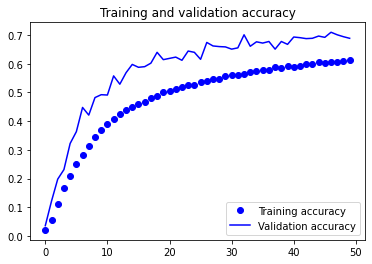

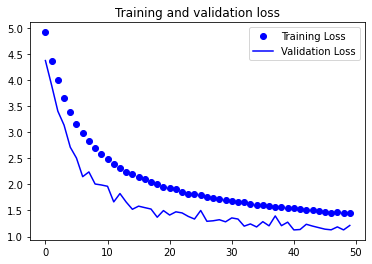

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can see that the model stabilized in an accuracy of 70%. Let's try using Transfer Learning to get a higher accuracy in the test data